# Data Mining Week 6 Class Assignment
 Kevin William Faith / 0706022310026

 Howie Homan / 0706022310040


# Load Dataset

In [195]:
# Import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree


In [196]:
# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv", delimiter=";")
# Display first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [198]:
# Check  missing value for each column
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


All columns show 0 missing values, which means the dataset is fully complete. There are no empty or missing entries, so we don’t need to fill in or remove any data. This means we can move straight to the next steps like encoding, splitting, and model training.




In [199]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Data Preprocessing

In [200]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

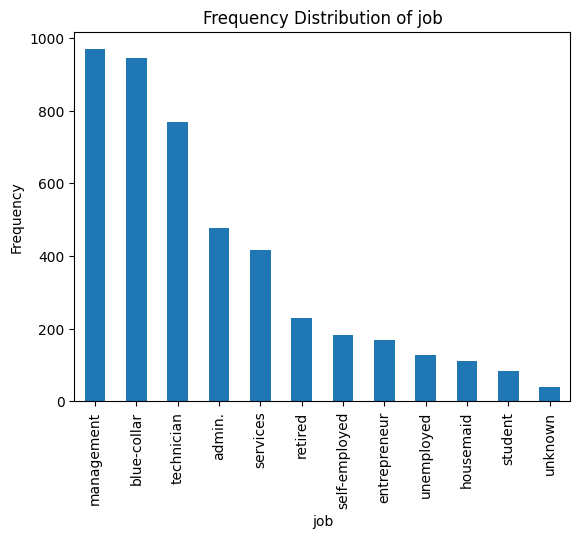

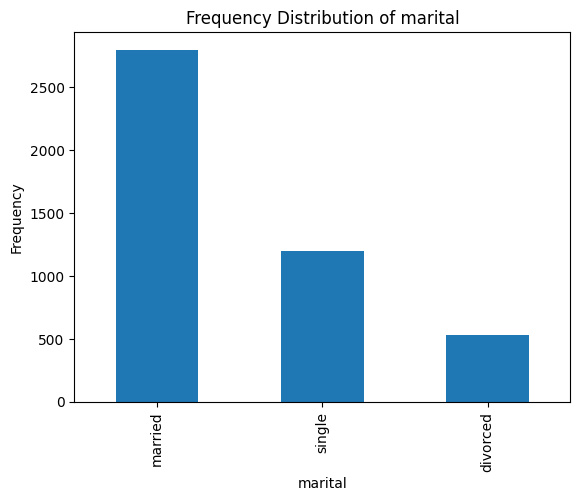

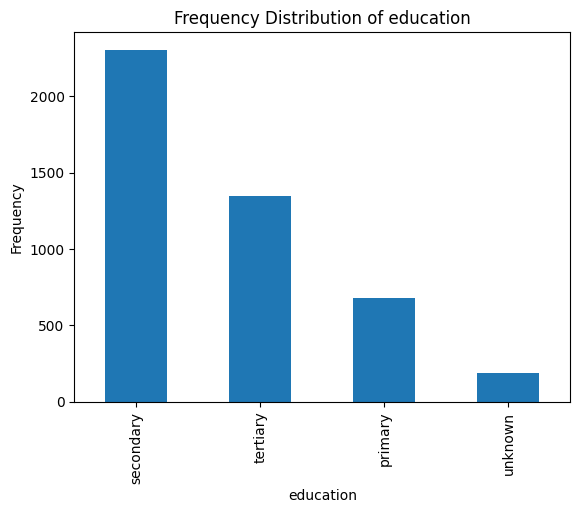

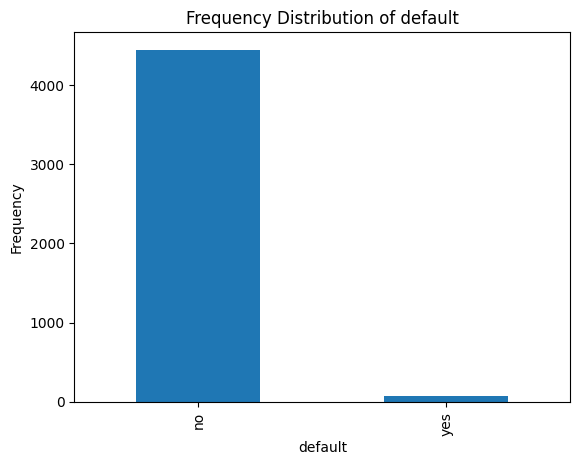

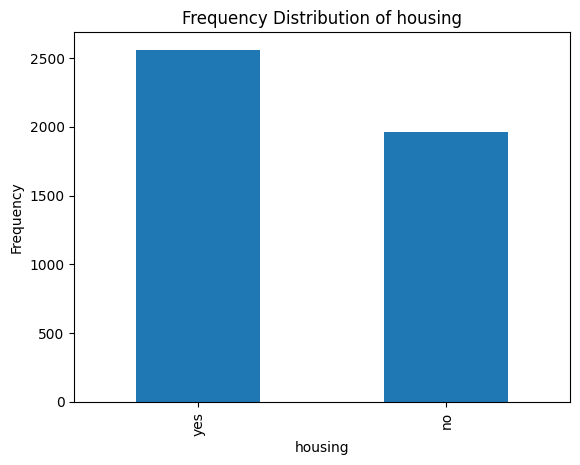

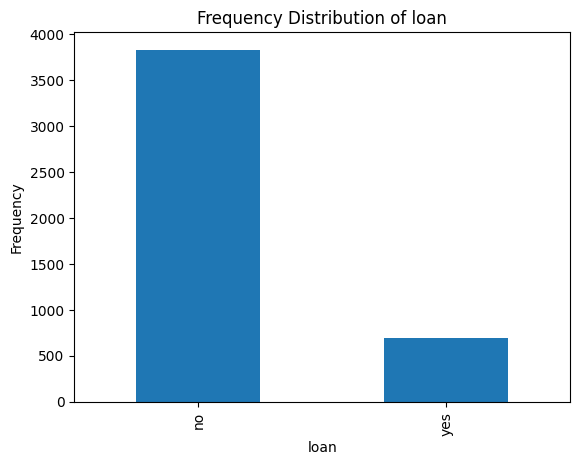

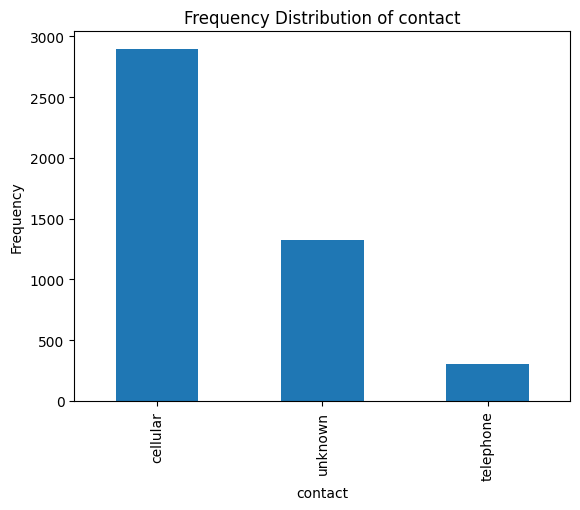

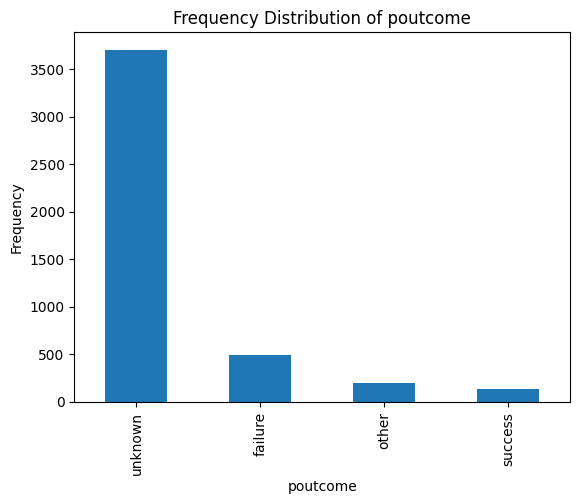

In [201]:
col_names = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in col_names:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

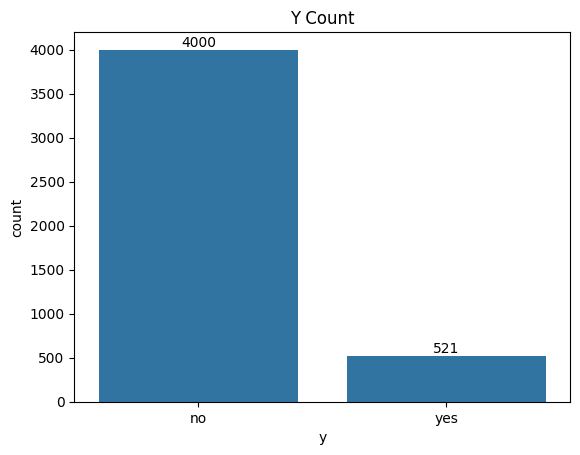

In [202]:
# Show how many y
ax = sns.countplot(data=df, x='y') # membuat countplot untuk kolom 'y'
plt.title('Y Count')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show() # menampilkan plot

The target variable distribution indicates a significant class imbalance in the dataset. Out of 4,521 clients, approximately 4,000 (88.5%) did not subscribe to the bank’s term deposit, while only 521 (11.5%) agreed to subscribe. This imbalance suggests that the majority of clients tend to reject marketing offers, highlighting the challenge of identifying the smaller segment of potential subscribers. In predictive modeling, such imbalance can cause bias toward the dominant class (“no”), making traditional accuracy metrics less reliable.

# EDA

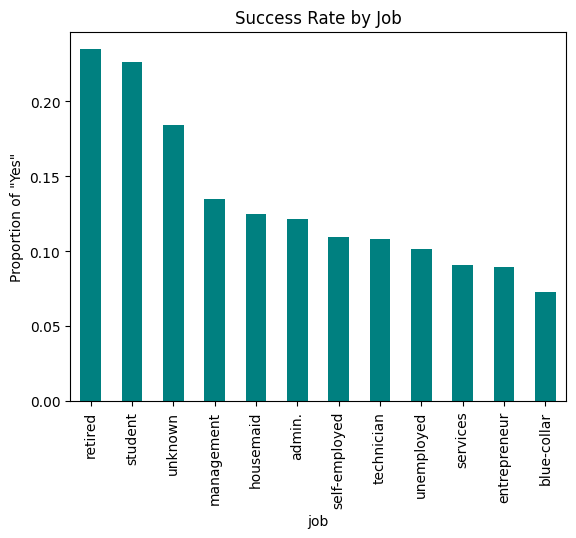

In [203]:
job_success = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)
job_success['yes'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Success Rate by Job')
plt.ylabel('Proportion of "Yes"')
plt.show()


The chart illustrates that the likelihood of subscribing to a term deposit varies notably across occupations. Clients who are retired and students show the highest success rates, each exceeding 20%, suggesting that these groups are more financially receptive to long-term savings products. The “unknown” and management categories also exhibit moderate success, while blue-collar, entrepreneur, and service workers display the lowest rates, indicating lower engagement or financial flexibility. Overall, the trend implies that occupation plays a significant role in influencing subscription behavior, with retirees and students being the most promising target segments for future marketing campaigns.

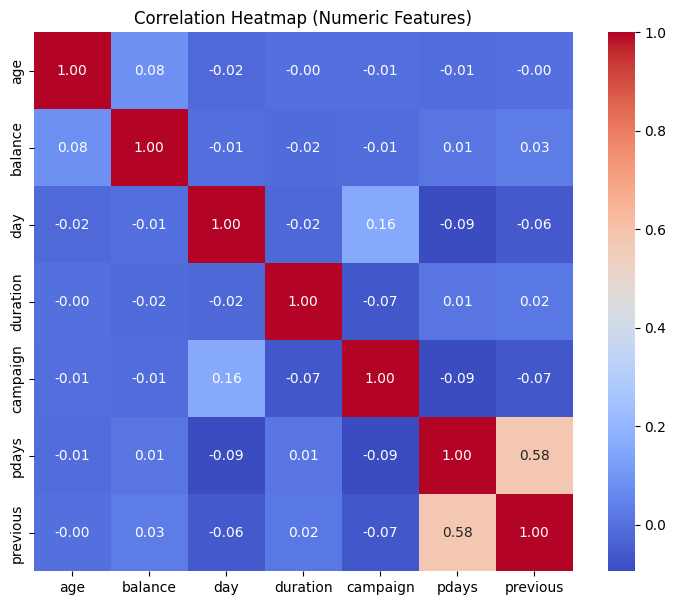

In [204]:
# Create the correlation heatmap for numeric features only
fig, ax = plt.subplots(figsize=(9,7))

# Define num_cols by selecting numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Compute the correlation matrix using only numeric features
corr = df[num_cols].corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=ax)
ax.set_title('Correlation Heatmap (Numeric Features)')
plt.show()


The correlation heatmap shows how strongly the numerical variables in the dataset are related to one another. Most of the relationships are very weak, indicating that the variables are largely independent and can each provide unique information for modeling. The only moderate positive correlation appears between pdays (days since last contact) and previous (number of previous contacts), with a coefficient of about 0.58, which makes sense because both describe the client’s contact history in previous campaigns. All other correlations, such as between age, balance, duration, campaign, and day, are close to zero, meaning they do not strongly influence or depend on one another. Overall, this suggests there is no serious multicollinearity among numeric features, and each variable can be safely used in the model for further analysis.

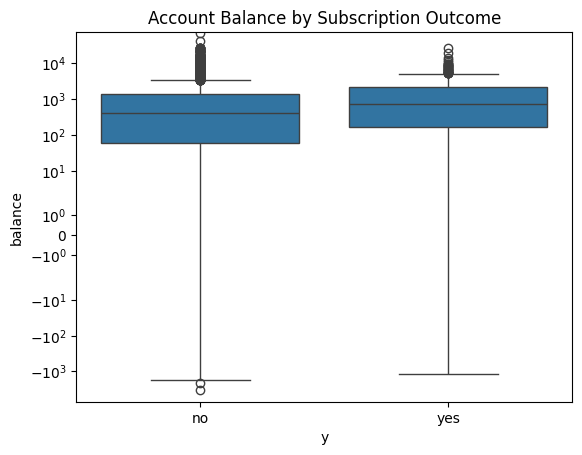

In [205]:
sns.boxplot(x='y', y='balance', data=df)
plt.title('Account Balance by Subscription Outcome')
plt.yscale('symlog')  # compress outliers for clarity
plt.show()

The boxplot shows that customers who subscribed (“yes”) generally have slightly higher and more stable account balances compared to those who did not (“no”). Although both groups share similar medians, the “no” group displays a wider range and more extreme negative balances, suggesting greater financial instability among non-subscribers. The presence of many high-balance outliers in both groups indicates a few wealthy clients, but overall, those with consistent or positive balances are more likely to commit to a term deposit. This suggests that account balance can serve as a moderate indicator of a customer’s likelihood to subscribe, helping the bank target financially stable clients more effectively.

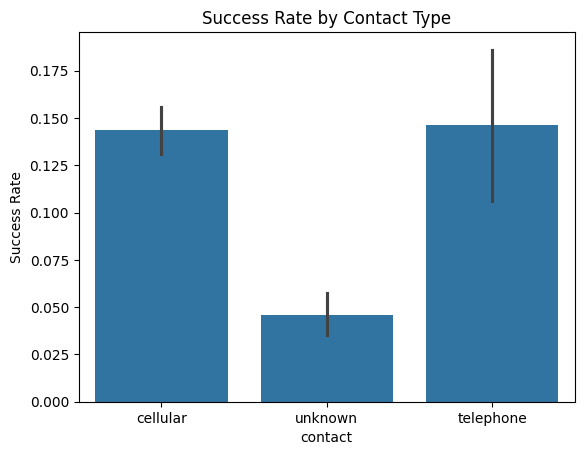

In [206]:
sns.barplot(x='contact', y=df['y'].eq('yes').astype(int), data=df, estimator=np.mean)
plt.title('Success Rate by Contact Type')
plt.ylabel('Success Rate')
plt.show()

The bar chart shows that contact type significantly affects the success rate of term deposit subscriptions. Customers reached via cellular or telephone had notably higher success rates, around 14–15%, compared to only about 4–5% for those with unknown contact types. This suggests that direct and personalized communication channels, such as mobile or landline calls, are far more effective in converting customers than impersonal or outdated contact methods. For the bank, this implies that focusing marketing efforts on verified contact channels—particularly cellular outreach—can substantially improve campaign effectiveness and customer engagement

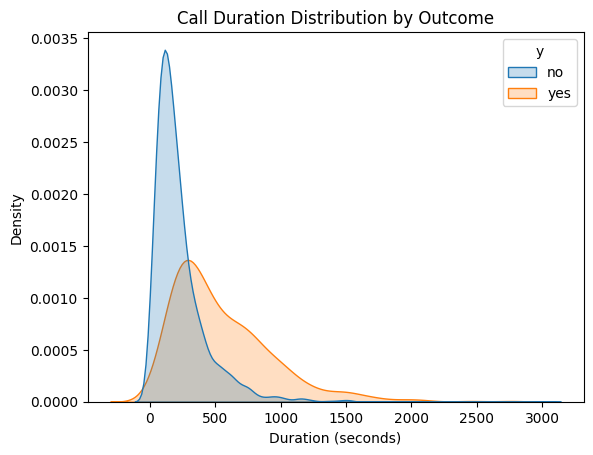

In [207]:
sns.kdeplot(data=df, x='duration', hue='y', fill=True, common_norm=False)
plt.title('Call Duration Distribution by Outcome')
plt.xlabel('Duration (seconds)')
plt.show()

This density plot illustrates how call duration relates to the likelihood of a successful term deposit subscription. The orange distribution (“yes”) is clearly shifted to the right compared to the blue (“no”), showing that successful outcomes are strongly associated with longer call durations. Most unsuccessful calls are short (under about 300 seconds), while calls leading to a “yes” often last significantly longer, even beyond 1,000 seconds in some cases. This suggests that when agents spend more time engaging with customers perhaps explaining benefits or addressing concerns the probability of a successful subscription increases. In practical terms, the bank could focus on quality, not just quantity, of calls, encouraging agents to maintain meaningful conversations rather than rushing through customer interactions.

# Feature Encoding

In [208]:
# Duplicate dataset
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pprint

# 1. Binary Mapping (One-Hot style for binary columns)
# Columns: default, housing, loan, y
binary_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}

# Apply binary mapping to specified columns
for col, mapping in binary_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Ordinal Encoding for Nominal Categorical Columns
nominal_cols = ['marital', 'education', 'contact', 'poutcome', 'month', 'job']

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit and transform nominal columns
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# 3. Build a mapping dictionary to show encoding results
encode_dict = {}

# Create a dictionary mapping of each categorical column
for col, categories in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(categories)}

# Display full dictionary
pprint.pprint(encode_dict)

# Show 5 random samples from encoded data
df_encoded.sample(n=5)


{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
770,26,1.0,2.0,1.0,0,-32,1,1,0.0,31,5.0,14,6,-1,0,3.0,0
3017,34,1.0,1.0,0.0,0,351,0,1,0.0,14,5.0,326,11,-1,0,3.0,0
1761,35,9.0,1.0,1.0,0,251,1,1,2.0,1,5.0,128,3,-1,0,3.0,0
711,35,3.0,0.0,1.0,0,39,0,0,0.0,31,5.0,149,2,-1,0,3.0,0
4217,38,10.0,1.0,2.0,0,2812,1,0,0.0,30,0.0,830,1,-1,0,3.0,1


In [209]:
# Checking the encoding result
df.loc[500]

,500
age,32
job,management
marital,single
education,tertiary
default,no
balance,12607
housing,no
loan,no
contact,cellular
day,14


# Separate features and target

In [210]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [211]:
display(X.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,2.0,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,2.0,5,8.0,226,1,-1,0,3.0


In [212]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


# Split Data

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [214]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [215]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4153,42,9.0,1.0,1.0,0,440,1,0,0.0,3,3.0,13,5,-1,0,3.0
2085,33,1.0,1.0,1.0,0,-77,1,0,0.0,28,5.0,151,3,-1,0,3.0
1891,32,4.0,2.0,2.0,0,656,1,1,0.0,20,0.0,148,2,-1,0,3.0
3611,28,9.0,2.0,1.0,0,389,1,0,0.0,11,8.0,15,7,-1,0,3.0
4015,36,9.0,1.0,1.0,0,5902,1,0,2.0,23,8.0,219,4,-1,0,3.0


In [216]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2398,51,2.0,1.0,1.0,1,-2082,0,1,0.0,28,5.0,123,6,-1,0,3.0
800,50,4.0,1.0,2.0,0,2881,0,0,0.0,5,1.0,510,2,2,5,1.0
2288,50,9.0,1.0,1.0,0,1412,0,0,0.0,6,1.0,131,3,-1,0,3.0
2344,37,4.0,1.0,2.0,0,0,1,0,2.0,3,6.0,247,13,-1,0,3.0
3615,31,0.0,2.0,1.0,0,757,0,0,0.0,3,3.0,343,2,-1,0,3.0


# Oversampling

In [217]:
# Using SMOTE-NC for datasets that contain both numerical and categorical features

from imblearn.over_sampling import SMOTENC

# We need to define categorical features first so the oversampling process is more accurate
# Identify categorical features by their index
categorical_features_indices = [X.columns.get_loc(col) for col in ['job', 'marital', 'education', 'default',
                                                                   'housing', 'loan', 'contact', 'poutcome', 'month']]

# Initialize SMOTE-NC
smotenc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)


# Apply SMOTE-NC oversampling
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# Always perform data partitioning AFTER oversampling/undersampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Check the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(5600, 16) (2400, 16)


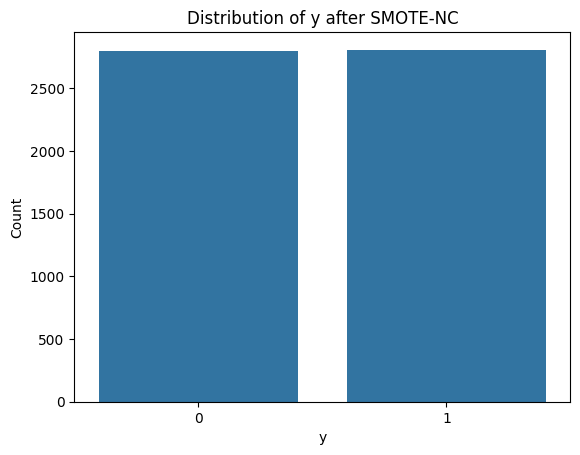

In [218]:
# Visualizing the class distribution of the target variable after applying SMOTE-NC
sns.countplot(x=y_train)  # Create a countplot for the target variable (y)
plt.title('Distribution of y after SMOTE-NC')  # Add a title
plt.xlabel('y')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.show()  # Display the plot

# Decision Tree

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Initialize the Decision Tree model with random_state=42 for consistent results
tree = DecisionTreeClassifier(random_state=42)

# Use the encoded DataFrame (df_encoded) for training
# Make sure X and y are defined from df_encoded before this cell is run
# Train the model using the resampled training data (which should now be from df_encoded)
tree.fit(X_train, y_train)

# Make predictions on both training and test datasets
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

# Display the classification report for the training set
print("\n=== Classification Report - Decision Tree (Training Set) ===")
print(classification_report(y_train, y_pred_train))

# Display the classification report for the test set
print("\n=== Classification Report - Decision Tree (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report - Decision Tree (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report - Decision Tree (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1206
           1       0.87      0.89      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



# KFold Cross Validation

In [220]:
# Let's split the data into 5 folds.
# We will use the 'kf' object (KFold splitting strategy) as input for the cross_val_score() method.
# The folds are created while maintaining the overall class proportions in each split.
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# The split() method generates indices to divide the data into training and testing sets.
for train_index, test_index in kf.split(X, y):
    print(f'Fold: {cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    cnt += 1

Fold: 1, Train set: 3616, Test set: 905
Fold: 2, Train set: 3617, Test set: 904
Fold: 3, Train set: 3617, Test set: 904
Fold: 4, Train set: 3617, Test set: 904
Fold: 5, Train set: 3617, Test set: 904


In [221]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.44230769 0.43076923 0.49107143 0.42201835 0.42512077]
Average score: 0.44


In [222]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier()
# Initialize the decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')
# Use F1 score as the evaluation metric for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_
# Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation F1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 42}
Best cross-validation F1 score: 0.867


# Feature Importance

In [223]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #Fungsi untuk menampilkan importansi fitur

Feature importances:
[4.66344297e-02 2.91781835e-02 2.67486199e-02 1.99588404e-02
 1.69467785e-04 1.15600246e-01 2.22433224e-02 3.46256082e-02
 7.07653464e-02 3.94448729e-02 5.99842021e-02 3.56160811e-01
 2.23138773e-02 7.68569581e-02 7.57033847e-03 7.17448756e-02]


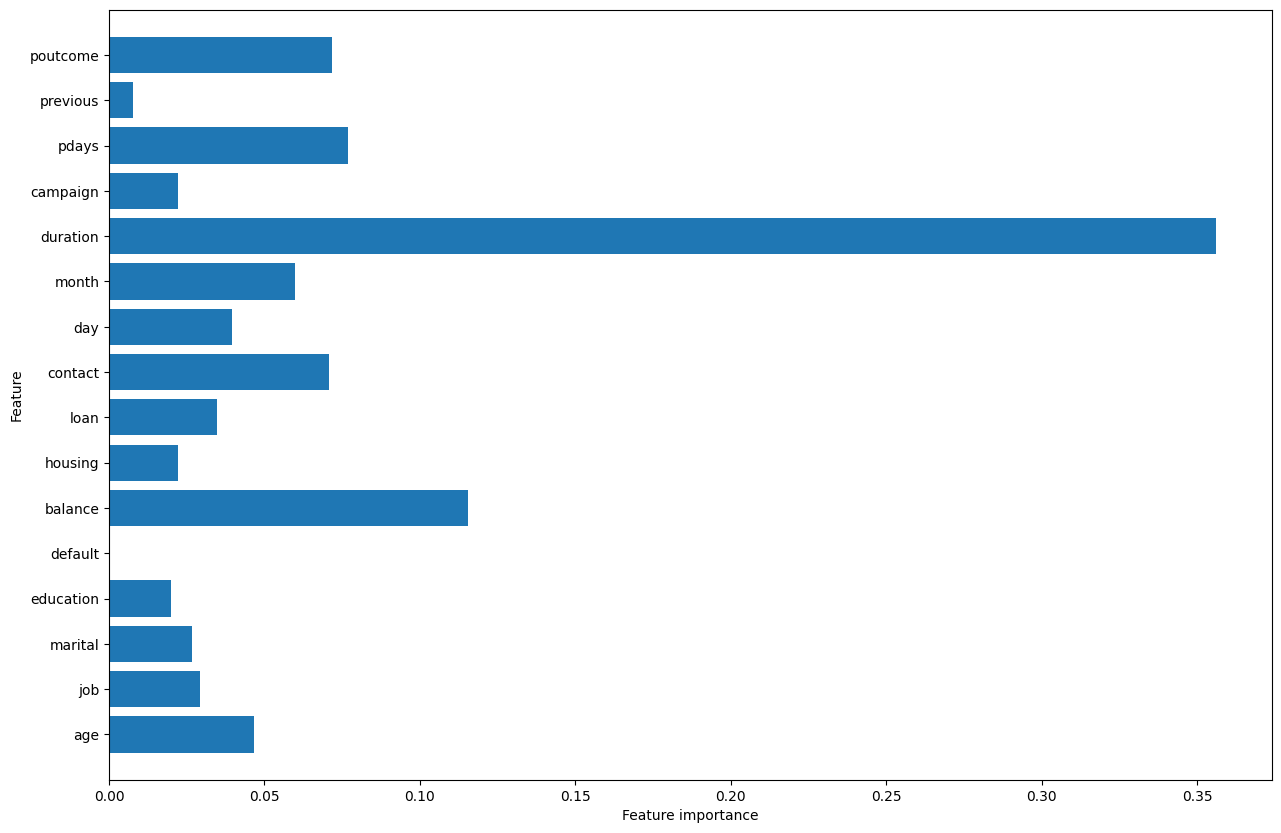

In [224]:
# Visualisasi feature importance
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1] # Mendapatkan jumlah fitur dari X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Menggunakan nama kolom dari X_train sebagai label
    plt.xlabel("Feature importance") # Label sumbu X
    plt.ylabel("Feature") # Label sumbu Y
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [225]:
# Untuk menampilkan fitur-fitur penting yang memiliki nilai importansi lebih dari 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.356161
balance,0.115600
pdays,0.076857
poutcome,0.071745
contact,0.070765
month,0.059984


In [226]:
# Menggunakan hanya fitur-fitur penting untuk prediksi
important_features = ["duration", "balance", "contact", "poutcome", "pdays", "month"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [227]:
display(X_importance)
display(y_importance)

,duration,balance,contact,poutcome,pdays,month
0,79,1787,0.0,3.0,-1,10.0
1,220,4789,0.0,0.0,339,8.0
2,185,1350,0.0,0.0,330,0.0
3,199,1476,2.0,3.0,-1,6.0
4,226,0,2.0,3.0,-1,8.0
...,...,...,...,...,...,...
4516,329,-333,0.0,3.0,-1,5.0
4517,153,-3313,2.0,3.0,-1,8.0
4518,151,295,0.0,3.0,-1,1.0
4519,129,1137,0.0,1.0,211,3.0


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [228]:
categorical_features = ["contact", "poutcome", "month"]
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)
X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((5600, 6), (2400, 6))

In [229]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)
importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)
y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report Decision Tree After Feature Importance (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))
print("\n=== Classification Report Decision Tree After Feature Importance (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report Decision Tree After Feature Importance (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Decision Tree After Feature Importance (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1206
           1       0.86      0.87      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



# Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Buat model Random Forest dengan parameter default (bawaan)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [231]:
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Show classification report
print("\n=== Classification Report Before Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))
print("\n=== Classification Report Before Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Before Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Before Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1206
           1       0.88      0.94      0.91      1194

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



# Hyperparameter Tuning using Grid Search

In [232]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=20)


In [233]:
rfmodel = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [234]:
y_pred_train = rfmodel.predict(X_train)
y_pred_test  = rfmodel.predict(X_test)

# Show classification report
print("\n=== Classification Report Random Forest After Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Random Forest After Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Random Forest After Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Random Forest After Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1206
           1       0.87      0.94      0.90      1194

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



# Gradient Boosting

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# Buat model dengan parameter default (bawaan)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [236]:
y_pred_train = gb_model.predict(X_train)
y_pred_test  = gb_model.predict(X_test)
print("\n=== Classification Report Gradient Boosting Before Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))
print("\n=== Classification Report Gradient Boosting Before Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Gradient Boosting Before Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2794
           1       0.84      0.90      0.87      2806

    accuracy                           0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600


=== Classification Report Gradient Boosting Before Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.83      0.85      1206
           1       0.84      0.89      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



# Hyperparameter Tuning using Grid Search

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
gb_model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best Model Accuracy: 0.9066666666666666


In [238]:
gbc_clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=7,
    random_state=42
)

# Melatih model dengan data pelatihan
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50,
                           random_state=42)

In [239]:
y_pred_train = gbc_clf.predict(X_train)
y_pred_test  = gbc_clf.predict(X_test)

# Laporan Klasifikasi
print("\n=== Classification Report Gradient Boosting After Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))
print("\n=== Classification Report Gradient Boosting After Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Gradient Boosting After Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2794
           1       0.98      0.99      0.98      2806

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


=== Classification Report Gradient Boosting After Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1206
           1       0.87      0.93      0.90      1194

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



# Model Evaluation

=== Model Performance Comparison (Test Set) ===
                                Model  Accuracy  Precision    Recall  F1-Score
0               Random Forest (Tuned)  0.900833   0.874022  0.935511  0.903722
1           Gradient Boosting (Tuned)  0.898750   0.873527  0.931323  0.901500
2  Decision Tree (Feature Importance)  0.861667   0.856198  0.867672  0.861897


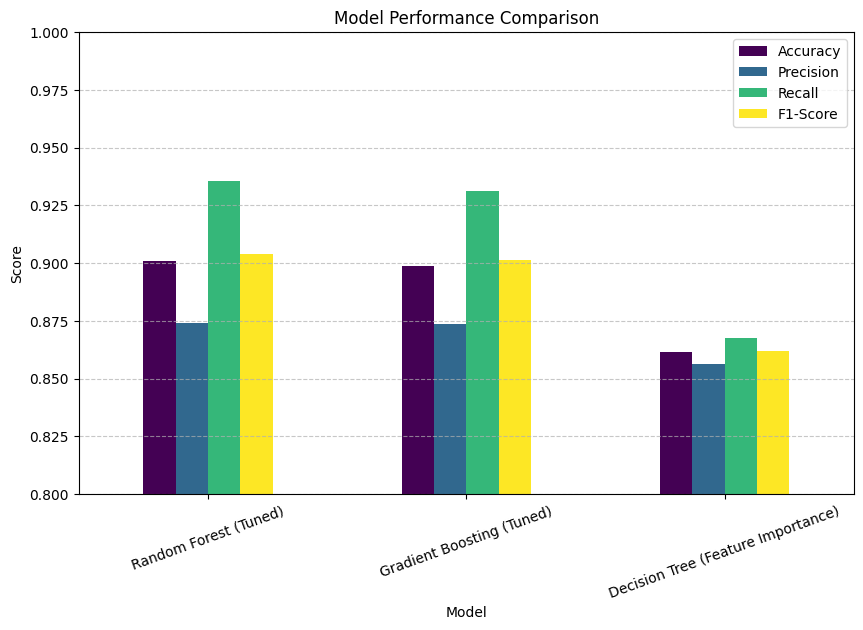

In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dictionary to store model predictions and labels
models = {
    "Decision Tree (Feature Importance)": (y_test_importance, importance_tree.predict(X_test_importance)),
    "Random Forest (Tuned)": (y_test, rfmodel.predict(X_test)),
    "Gradient Boosting (Tuned)": (y_test, gbc_clf.predict(X_test))
}

# Collect evaluation metrics for each model
results = []

for model_name, (y_true, y_pred) in models.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(results)

# Sort by F1-Score (best model at top)
comparison_df = comparison_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Display the comparison table
print("=== Model Performance Comparison (Test Set) ===")
print(comparison_df)

# Optional: visualize results as a bar chart
comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar", figsize=(10,6), colormap="viridis", rot=20, title="Model Performance Comparison"
)
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* The Decision Tree serves as a good baseline but suffers from overfitting.

* The Random Forest and Gradient Boosting models both achieve strong, balanced performance on unseen data.

* Gradient Boosting shows the best trade-off between accuracy and generalization, making it the most reliable model for deployment.

1. The Random Forest (Tuned) model achieves the highest overall F1-Score (0.904) and highest recall (0.936) among all models.

* This means it is best at identifying both classes correctly, especially the minority class (“yes” to term deposit).

* The model generalizes well and balances precision (avoiding false positives) with recall (catching true positives).

2. The Gradient Boosting (Tuned) model performs very closely (F1 = 0.902) but is slightly lower in recall.

* It’s equally strong in precision, meaning its predictions are reliable and stable, but it’s marginally less sensitive than Random Forest.

3. The Decision Tree (Feature Importance) model trails behind with F1 = 0.862.

* It performs decently but shows lower accuracy and recall, confirming that a single tree lacks the ensemble power to generalize effectively — it’s more prone to overfitting and missing complex patterns.

# Best Model
The Random Forest (Tuned) model is the best performer overall because it achieves the highest F1-score (0.904), indicating the best balance between precision and recall. Its ensemble nature (multiple decision trees) captures complex relationships in the data while reducing overfitting. Although Gradient Boosting is very close, Random Forest edges ahead with slightly better recall, making it the most reliable model for predicting term deposit subscriptions in this dataset.

# Did ensemble methods improve performance?
Yes. Both ensemble methods Random Forest and Gradient Boosting clearly outperformed the single Decision Tree model.
The Decision Tree achieved an F1-score of 0.86, while Random Forest and Gradient Boosting reached 0.90 on the test set.
This improvement happens because ensemble methods combine multiple decision trees to reduce overfitting and improve generalization.
Random Forest reduces variance by averaging many uncorrelated trees (bagging), while Gradient Boosting reduces bias by sequentially correcting the previous trees’ errors.
As a result, ensemble models produce more stable and accurate predictions, making them more reliable for real-world marketing decisions.

# How could the bank use these insights to refine its marketing strategy?
The results show that machine learning can identify which customers are most likely to subscribe to a term deposit.
The bank can use the feature importance scores from the ensemble models to understand which factors (e.g., call duration, previous campaign outcomes, job type, or contact channel) most influence customer decisions.
By focusing on clients with higher predicted probabilities of saying “yes,” the bank can prioritize resources, reduce unnecessary calls, and increase campaign efficiency.
Additionally, insights from the models can guide personalized marketing for example, targeting retirees or students with tailored messages, optimizing contact timing, or choosing more effective communication channels (like cellular over telephone).
Overall, the ensemble-driven approach helps the bank move toward data-informed and cost-efficient marketing strategies.